In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plotar_coordenadas_polares(arquivo):
    """
    Função para ler arquivo e criar gráfico polar, ignorando a primeira linha
    
    Parameters:
    arquivo (str): Caminho para o arquivo de dados
    """
    try:
        # Carrega os dados do arquivo, pulando a primeira linha
        dados = np.loadtxt('orbit_data.txt', skiprows=1)
        
        # Extrai as colunas 2 e 3 (índices 1 e 2 em Python)
        raios = dados[:, 1]  # coluna 2
        angulos = dados[:, 2]  # coluna 3
        
        # Remove linhas com NaN
        mask = ~np.isnan(raios) & ~np.isnan(angulos)
        raios = raios[mask]
        angulos = angulos[mask]
        
        # Cria a figura com subplot polar
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111, projection='polar')
        
        # Plota os dados como linha fina
        ax.plot(angulos, raios, linewidth=1)
        
        # Define o limite do raio para mostrar todos os dados
        ax.set_ylim(0, np.max(raios) * 1.1)
        
        # Personaliza o gráfico
        ax.set_title('r versus phi')
        ax.grid(True)
        
        # Exibe o gráfico
        plt.show()
        
    except FileNotFoundError:
        print(f"Erro: O arquivo {'orbit_data.txt'} não foi encontrado.")
    except IndexError:
        print("Erro: O arquivo não possui colunas suficientes.")
    except Exception as e:
        print(f"Erro inesperado: {str(e)}")

    

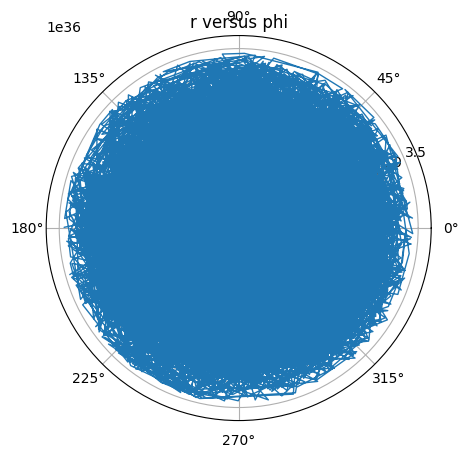

In [33]:
plotar_coordenadas_polares('orbit_data.txt')

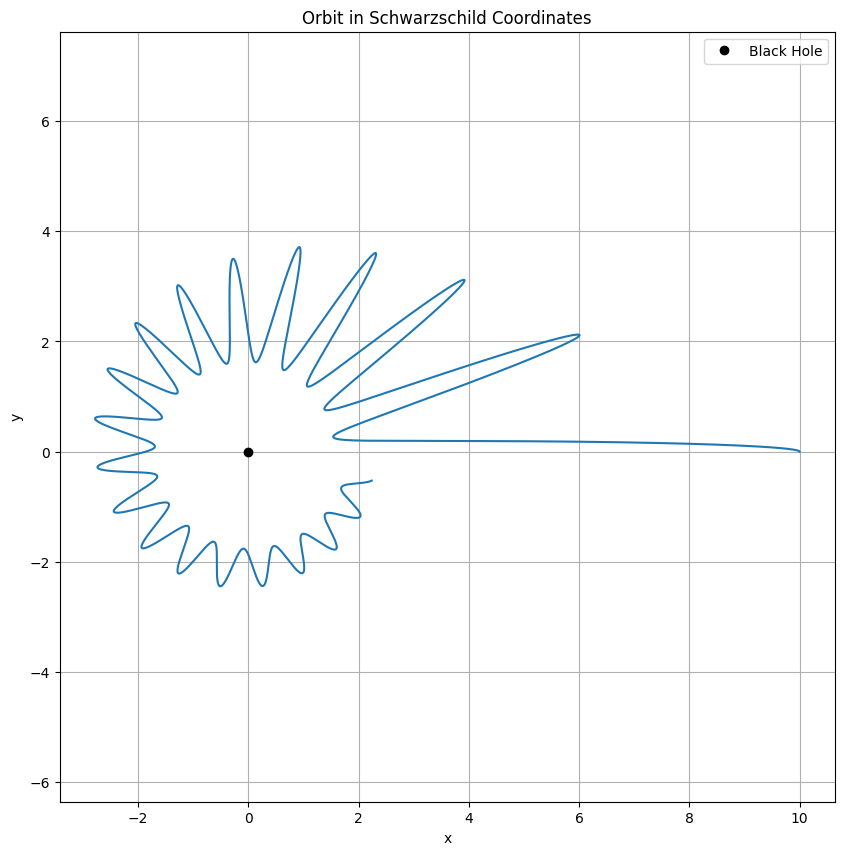

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def schwarzschild_deriv(t, state, M):
    r, phi, pr, pphi = state
    rs = 2 * M
    
    dr_dt = pr
    dphi_dt = pphi / (r ** 2)
    dpr_dt = (pphi ** 2 / r ** 3) - (M / (r ** 2)) * (1 - rs/r) + (3 * rs * pr ** 2) / (2 * r ** 2)
    dpphi_dt = 0
    
    return [dr_dt, dphi_dt, dpr_dt, dpphi_dt]

def rk8_step(f, t, state, dt, M):
    k1 = dt * np.array(f(t, state, M))
    k2 = dt * np.array(f(t + dt/6, state + k1/6, M))
    k3 = dt * np.array(f(t + dt/3, state + k1/3 + k2/3, M))
    k4 = dt * np.array(f(t + dt/2, state + k1/8 + 3*k2/8 + 3*k3/8, M))
    k5 = dt * np.array(f(t + 2*dt/3, state + k1/2 - 3*k3/2 + 2*k4, M))
    k6 = dt * np.array(f(t + 5*dt/6, state + k1 - 2*k3 + k4 + k5, M))
    k7 = dt * np.array(f(t + dt, state + k1/6 + 2*k3/3 - k4/12 + k5/4 + k6/6, M))
    return state + (7*k1 + 32*k3 + 12*k4 + 32*k5 + 7*k6 + k7) / 90

def simulate_orbit(r0, phi0, pr0, pphi0, M, t_span, dt):
    initial_state = [r0, phi0, pr0, pphi0]
    times = [0]
    positions = [initial_state]
    
    t = 0
    state = initial_state
    while t < t_span:
        state = rk8_step(schwarzschild_deriv, t, state, dt, M)
        t += dt
        times.append(t)
        positions.append(state)
    
    return np.array(times), np.array(positions)

# Simulation parameters
M = 1.0
r0 = 10.0
phi0 = 0.0
pr0 = 0.0
pphi0 = 0.07
t_span = 500.0
dt = 0.1

# Run simulation
times, positions = simulate_orbit(r0, phi0, pr0, pphi0, M, t_span, dt)

# Convert to Cartesian coordinates for plotting
x = positions[:, 0] * np.cos(positions[:, 1])
y = positions[:, 0] * np.sin(positions[:, 1])

# Plot the result
plt.figure(figsize=(10, 10))
plt.plot(x, y)
plt.plot(0, 0, 'ko', label='Black Hole')
plt.axis('equal')
plt.grid(True)
plt.title('Orbit in Schwarzschild Coordinates')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()